In [ ]:
import pip

def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])  


import_or_install('mysql-connector-python') 
import_or_install('pandas') 
import_or_install('matplotlib') 
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt


In [ ]:
#print(df) 

## sql

'''
conn = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database='big_bang'
)


mycursor = conn.cursor()

mycursor.execute("CREATE DATABASE IF NOT EXISTS big_bang")

mycursor.execute("CREATE TABLE IF NOT EXISTS bbt_dataset (ID int NOT NULL,Location varchar (500), Scene varchar (500), Text varchar (500), Speaker varchar(100), Season int, PRIMARY KEY (ID))")


sql =''
for index, row in df.iterrows():
    str_values = df.loc[index, :].values.flatten().tolist()

    count = 0
    values = ''
    for i  in str_values: ##crear el string SQL
        if count == 0:
            values = values +str(i)+","
        elif count == len(str_values)-1:
            values = values +str(i)
        else:
            if i == 'nan':
            values = values+"'"+str(i)+"',"
        count += 1
    sql = "INSERT IGNORE INTO big_bang.bbt_dataset ("+columns+") VALUES ("+values+");"
    #ejecutar el query
    mycursor.execute(sql)
    #aplicar los cambios en la db
    conn.commit()
#cierre de conexion 
conn.close()
print ('termine')
    '''

In [28]:



## crear data frame

df = pd.read_csv('big_bang_theory_dataset.csv')
# get first row using row position
df.rename(columns={'Unnamed: 0': "ID"}, inplace=True)
df.fillna('', inplace=True)
df['Text'] = df['Text'].apply(lambda x: x.strip())
df['Location'] = df['Location'].apply(lambda x: x.strip())
columns = list(df.columns)

##columns[0] = 'ID'

columns = ','.join(columns)

print(columns) 


# create a dataframe 
sheldon_df = df[df['Speaker'] == 'Sheldon']
sheldon_df = pd.DataFrame(sheldon_df, columns = ['Text','Location']) 
sh_penny_df = sheldon_df[sheldon_df['Text'] == 'Penny.']
contiene_sh_penny_df = sheldon_df[df['Text'].str.contains("Penny")==True]
contiene_sh_penny_df['contiene'] = 1



ID,Location,Scene,Text,Speaker,Season


C:\Users\mauco\AppData\Local\Temp\ipykernel_23156\3617392586.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contiene_sh_penny_df = sheldon_df[df['Text'].str.contains("Penny")==True]
C:\Users\mauco\AppData\Local\Temp\ipykernel_23156\3617392586.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contiene_sh_penny_df['contiene'] = 1


In [29]:
contiene_sh_penny_df

,Text,Location,contiene
35,Because he’s not like us Penny. We’re dreamers.,Penny’s car,1
47,Penny.,Penny’s door,1
125,This isn’t fair. You’ve discussed aspects of o...,Sheldon and Amy’s apartment,1
185,Penny please we’re facing a far more serious p...,The apartment,1
503,Hang on Penny. How about fans here and here?,Penny’s apartment,1
...,...,...,...
38332,Well then it’s all settled Christie will stay ...,The following morning,1
38424,Penny has dragged a chair in off the street wh...,Amy’s apartment,1
38590,But we did convince him to leave the motel. Co...,The living room,1
38708,Penny!,Penny’s apartment,1


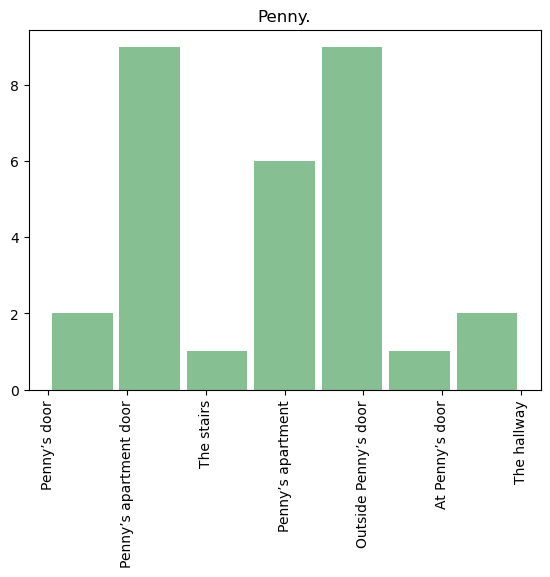

In [81]:
from matplotlib.ticker import MaxNLocator

ax = sh_penny_df.hist(column='Location', by='Text', bins=7, grid=False,  color='#86bf91',  rwidth=0.9)

plt.show()

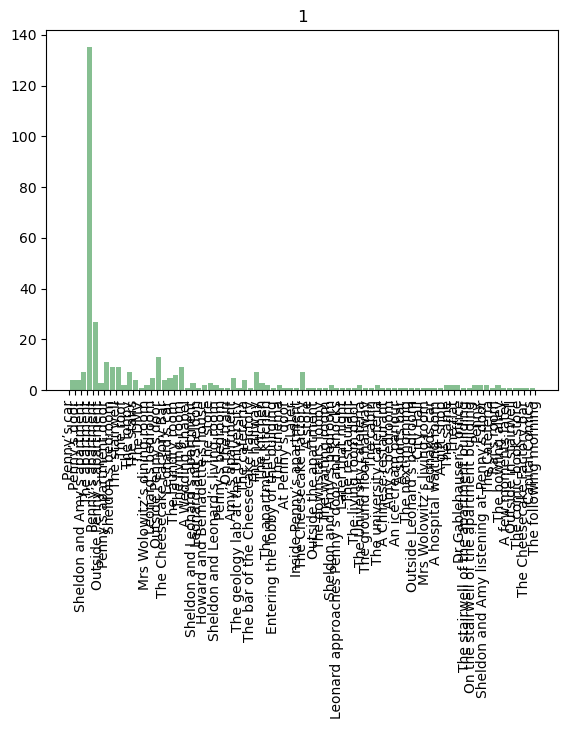

In [66]:
ax2 = contiene_sh_penny_df.hist(column='Location', by='contiene', bins=81, grid=False,  color='#86bf91',  rwidth=0.9)